In [1]:
import GA_func as ga
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample = ga.generateFirstGen()

In [3]:
test_score = ga.fitness_score(sample)
print(min(test_score))

-3.9402712728522302


In [4]:
# with swap mutation
pop = sample
min_value1 = []
score = ga.fitness_score(pop)
min_value1.append(min(score))
# min_value1.append(np.mean(score))

for i in range(3000):
    parents_index = ga.selectParent(pop, score)
    pop = ga.crossOver(pop, parents_index)
    pop = ga.mutation(pop, ga.swapMutation, 0.5)
    score = ga.fitness_score(pop)
    min_value1.append(min(score))
    # min_value1.append(np.mean(score))

print("Min value: ",min_value1[-1]*1000)
print("After: 3000 cycle")


Min value:  685.3970021624632
After: 3000 cycle


Text(0,0.5,'Value')

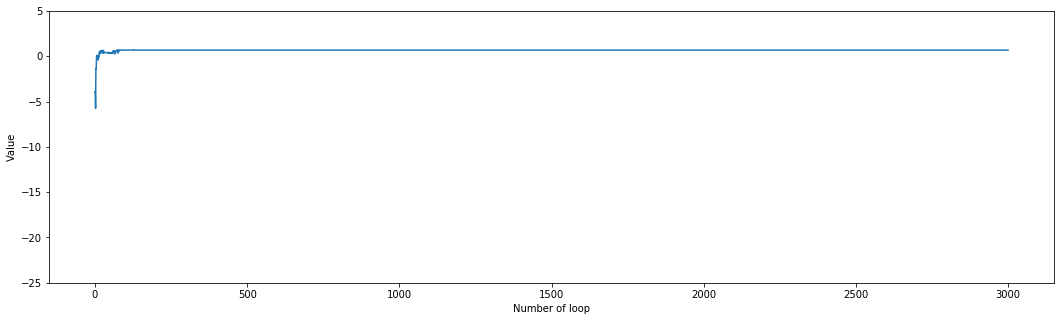

In [5]:
plt.figure(figsize = [18,5])
plt.plot(min_value1)
plt.ylim(bottom = -25, top = 5)
plt.xlabel('Number of loop')
plt.ylabel('Value')

# for checking error
i = 0
for x in pop:
    if(x.shape != (50,)):
        print(i, '.', x.shape)
        i += 1

In [6]:
# with scramble mutation
pop = sample
min_value2 = []
score = ga.fitness_score(pop)
min_value2.append(min(score))

for i in range(3000):
    parents_index = ga.selectParent(pop, score)
    pop = ga.crossOver(pop, parents_index)
    pop = ga.mutation(pop, ga.scrambleMutation, 0.5)
    score = ga.fitness_score(pop)
    min_value2.append(min(score))

print("Min value: ",min_value2[-1]*1000)

Min value:  -222.49043392731357


Text(0,0.5,'Value')

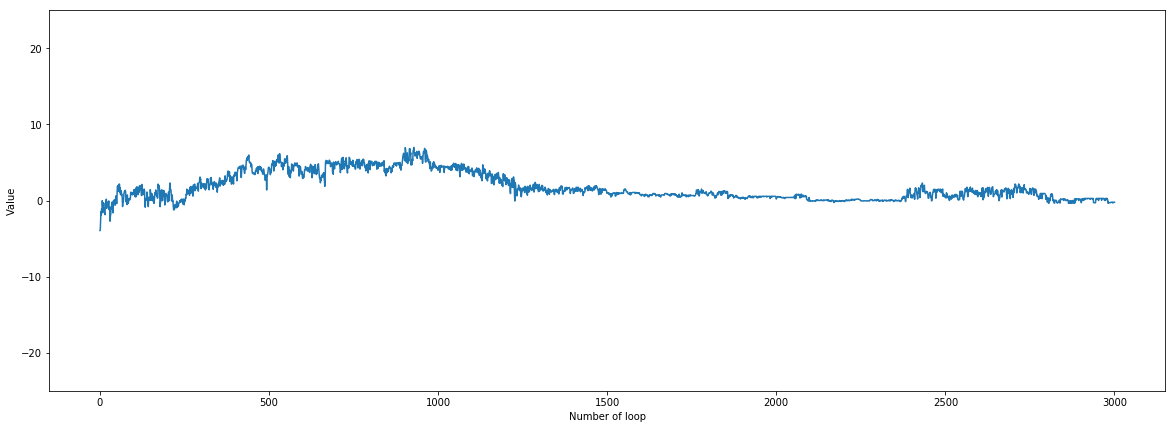

In [7]:
plt.figure(figsize = [20,7])
plt.plot(min_value2)
plt.ylim(bottom = -25, top = 25)
plt.xlabel('Number of loop')
plt.ylabel('Value')

In [8]:
# with inverse mutation
pop = sample
min_value3 = []
score = ga.fitness_score(pop)
min_value3.append(min(score))

for i in range(3000):
    parents_index = ga.selectParent(pop, score)
    pop = ga.crossOver(pop, parents_index)
    pop = ga.mutation(pop, ga.inverseMutation, 0.5)
    score = ga.fitness_score(pop)
    min_value3.append(min(score))

print("Min value: ",min_value3[-1]*1000)

Min value:  -3780.7637394433054


Text(0,0.5,'Value')

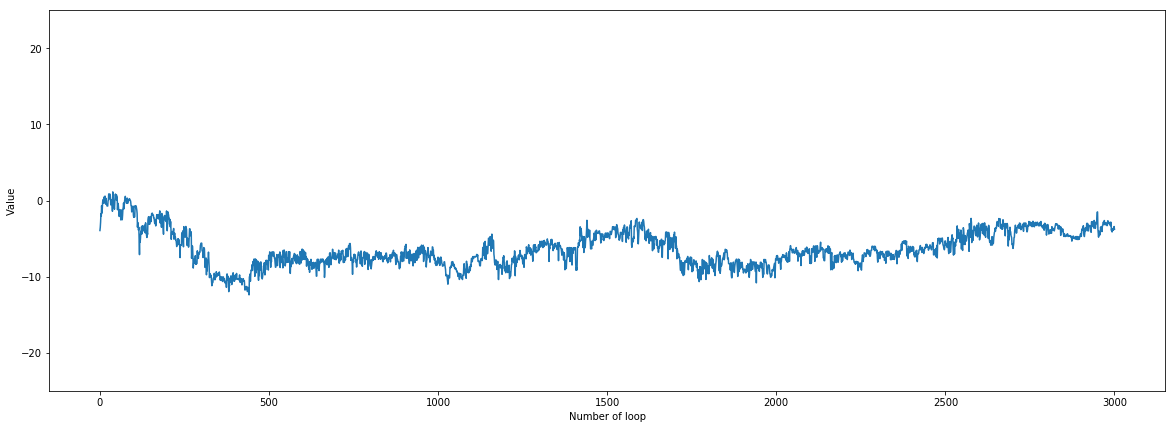

In [9]:
plt.figure(figsize = [20,7])
plt.plot(min_value3)
plt.ylim(bottom = -25, top = 25)
plt.xlabel('Number of loop')
plt.ylabel('Value')

In [10]:
# with random resetting
pop = sample
min_value4 = []
score = ga.fitness_score(pop)
min_value4.append(min(score))

for i in range(3000):
    parents_index = ga.selectParent(pop, score)
    pop = ga.crossOver(pop, parents_index)
    pop = ga.mutation(pop, ga.randomResetting, 0.5)
    score = ga.fitness_score(pop)
    min_value4.append(min(score))

print("Min value: ",min_value4[-1]*1000)

Min value:  -3478.0


Text(0,0.5,'Value')

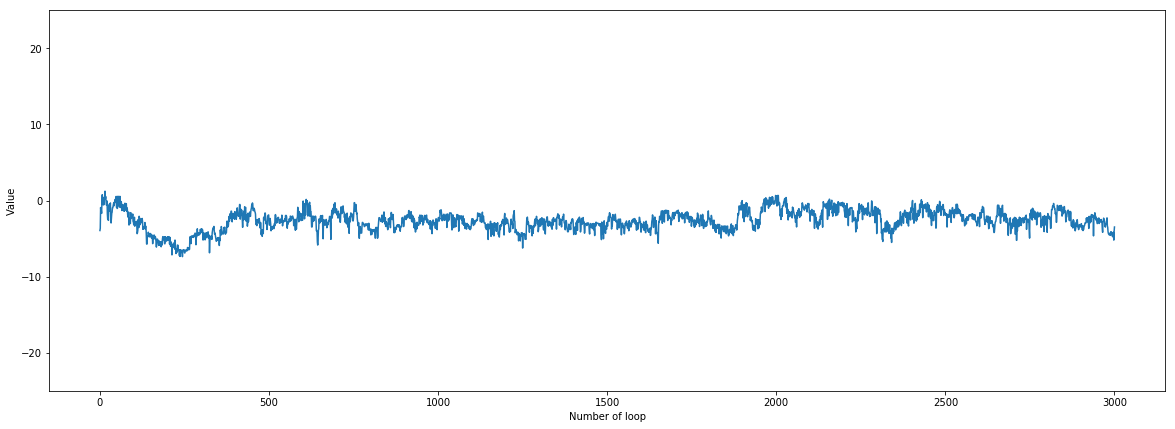

In [11]:
plt.figure(figsize = [20,7])
plt.plot(min_value4)
plt.ylim(bottom = -25, top = 25)
plt.xlabel('Number of loop')
plt.ylabel('Value')

# Test attribute: Mutation rate = 0.5
# Method: TS - MPC - SM(2)/ScM/IM/RR(3)
With the same sample with different types of mutation, after testing a few times, here is my result:

SM --  ScM  --  IM  -- RR

23(4)  ; 177(3); 448(1) ; 130(2)

45(4)  ; 151(3) ; 265(1) ; 26(2)

130(4) ; 410(4) ; 11(2)  ; 326(1)

37(3)  ; 312(4) ; 6(2)   ; 278(1)

4(2)   ; 159(4) ; 160(3) ; 45(1)

# Here is my assessment:
SM and ScM ,in general, would likely to bring out worst-fit results while IM and RR do opposite. The more loop before convergence occurs, the more likely we have a good-fit result.



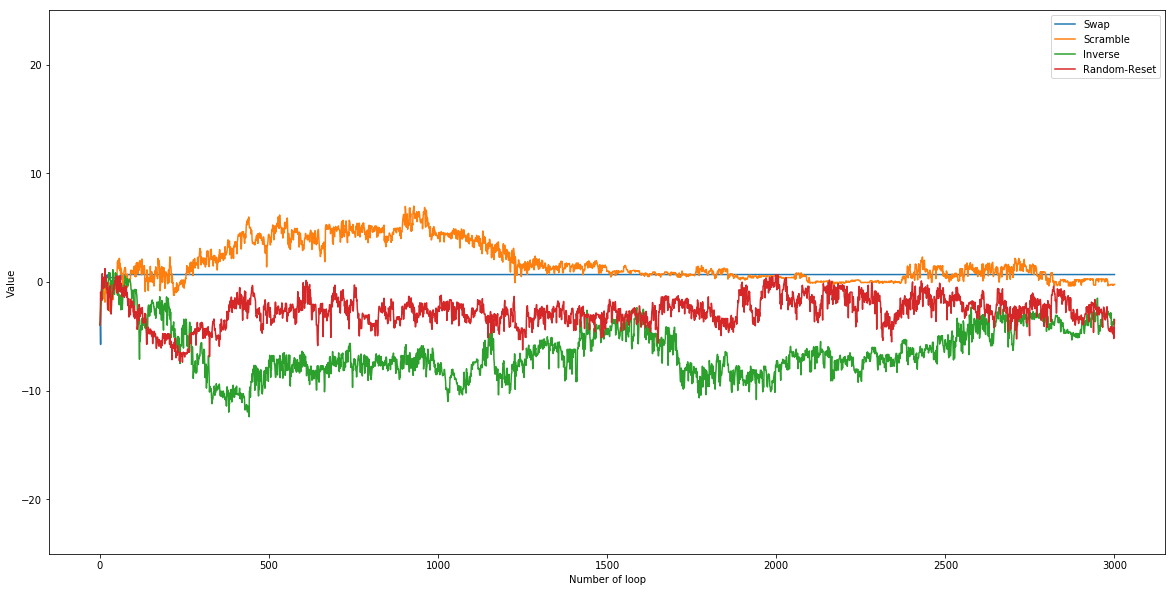

In [12]:
plt.figure(figsize = [20,10])
plt.plot(min_value1)
plt.plot(min_value2)
plt.plot(min_value3)
plt.plot(min_value4)
plt.legend(['Swap', 'Scramble', 'Inverse', 'Random-Reset'])
plt.ylim(bottom = -25, top = 25)
plt.xlabel('Number of loop')
plt.ylabel('Value')
plt.savefig('result/convergence.png')